In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'E:\UTH\reddit\reddit_comments_20250130_003525.csv')

In [4]:
df

,post_title,post_date,post_score,post_author,post_num_comments,comment_id,comment_author,comment_body,comment_score,comment_date,is_submitter
0,Knorr has been reducing the quantity and incre...,2024-08-12,225,Middle_child496,138,lhqgv0j,honest_jamal,"Indomie taste better, give more noodles and ar...",91,2024-08-12,False
1,Knorr has been reducing the quantity and incre...,2024-08-12,225,Middle_child496,138,lhqgu8p,Poodina,I dont understand why people aren't talking ab...,64,2024-08-12,False
2,Knorr has been reducing the quantity and incre...,2024-08-12,225,Middle_child496,138,lhqi6r7,Stock-Respond5598,Shrinkflation at its finest.,31,2024-08-12,False
3,Knorr has been reducing the quantity and incre...,2024-08-12,225,Middle_child496,138,lhqrh0r,kingshuk3,Bro discovered shrinkflation,20,2024-08-12,False
4,Knorr has been reducing the quantity and incre...,2024-08-12,225,Middle_child496,138,lhqsbra,Zacnocap,"Indomie are faaar better then these , indomie ...",15,2024-08-12,False
...,...,...,...,...,...,...,...,...,...,...,...
675,How people who love Indomie noodles look at pe...,2023-05-22,144,_NineZero_,74,jl95ypw,PrinceSam321,From where are you getting it ?,1,2023-05-23,False
676,How people who love Indomie noodles look at pe...,2023-05-22,144,_NineZero_,74,jl5lyvs,mkbilli,Mujha yad hai aik zamanay mein 100 USD (6000 p...,3,2023-05-22,False
677,How people who love Indomie noodles look at pe...,2023-05-22,144,_NineZero_,74,jl9rgz4,Ancient-Astronaut-98,Yess I imagine\r\n\r\nTry with a little sugar\...,1,2023-05-23,False
678,How people who love Indomie noodles look at pe...,2023-05-22,144,_NineZero_,74,jlahh6y,Connect-Effort5979,I am not in Pakistan rn.,2,2023-05-23,False


In [6]:
df.columns

Index(['post_title', 'post_date', 'post_score', 'post_author',
       'post_num_comments', 'comment_id', 'comment_author', 'comment_body',
       'comment_score', 'comment_date', 'is_submitter'],
      dtype='object')

C:\Users\Raman\AppData\Local\Temp\ipykernel_20228\1003528877.py:48: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[theme] = df['comment_body'].str.lower().str.contains(pattern, case=False)



=== KNORR REDDIT ANALYSIS INSIGHTS ===

Total Comments Analyzed: 680
Average Sentiment: 0.08

Competitor Mentions:
- Indomie: 70
- Samyang: 13
- shoop: 20

Theme Distribution:
- Price Related: 50
- Quantity Related: 27
- Quality Related: 102
- Boycott Related: 15

Top Words Used:
- they: 120
- but: 95
- indomie: 85
- them: 76
- one: 75
- from: 63
- good: 60
- like: 57
- better: 53
- pakistan: 53


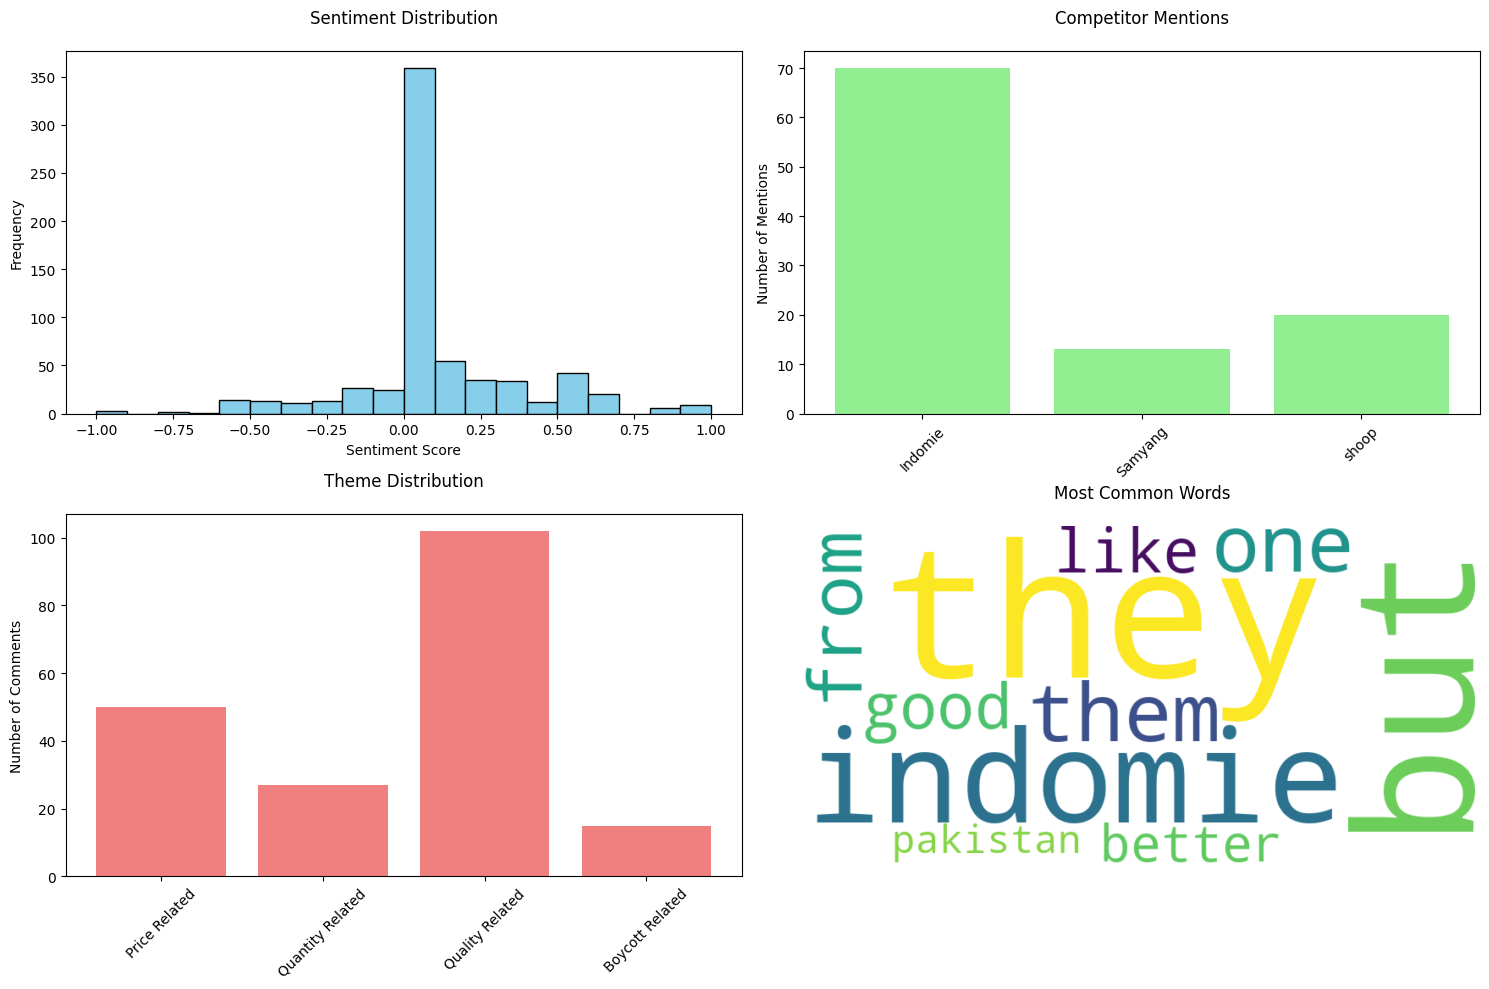

In [14]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def clean_text(text):
    """Clean and preprocess text data."""
    # Convert to lowercase and remove special characters
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

def simple_tokenize(text):
    """Simple word tokenization without requiring NLTK."""
    return text.split()

def extract_sentiment(text):
    """Extract sentiment scores using TextBlob."""
    return TextBlob(str(text)).sentiment.polarity

def analyze_comments(df):
    """Comprehensive analysis of comments."""
    # Add sentiment scores
    df['sentiment'] = df['comment_body'].apply(extract_sentiment)
    
    # Identify competitors mentioned
    competitor_keywords = {
        'indomie': 'Indomie',
        'samyang': 'Samyang',
        'shoop': 'shoop'
    }
    
    for keyword, brand in competitor_keywords.items():
        df[f'mentions_{brand}'] = df['comment_body'].str.lower().str.contains(keyword, case=False)
    
    # Extract common themes
    themes = {
        'price_related': r'(price|expensive|cost|rupees)',
        'quantity_related': r'(quantity|amount|size|reduce|less)',
        'quality_related': r'(quality|taste|flavor)',
        'boycott_related': r'(boycott|palestine|israeli)',
    }
    
    for theme, pattern in themes.items():
        df[theme] = df['comment_body'].str.lower().str.contains(pattern, case=False)
    
    return df

def generate_insights(df):
    """Generate key insights from the analyzed data."""
    insights = {
        'total_comments': len(df),
        'average_sentiment': df['sentiment'].mean(),
        'competitor_mentions': {
            'Indomie': df['mentions_Indomie'].sum(),
            'Samyang': df['mentions_Samyang'].sum(),
            'shoop': df['mentions_shoop'].sum()
        },
        'theme_distribution': {
            'Price Related': df['price_related'].sum(),
            'Quantity Related': df['quantity_related'].sum(),
            'Quality Related': df['quality_related'].sum(),
            'Boycott Related': df['boycott_related'].sum()
        }
    }
    
    # Generate word frequencies
    all_text = ' '.join(df['comment_body'].apply(clean_text))
    # Basic stopwords list
    stop_words = {'and', 'the', 'is', 'in', 'it', 'to', 'for', 'of', 'that', 'this',
                 'are', 'was', 'with', 'you', 'have', 'knorr', 'noodles'}
    
    words = simple_tokenize(all_text)
    words = [word for word in words if word not in stop_words and len(word) > 2]
    word_freq = Counter(words).most_common(10)
    
    insights['top_words'] = dict(word_freq)
    
    return insights

def visualize_insights(df, insights):
    """Create visualizations for the insights."""
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Sentiment Distribution
    plt.subplot(2, 2, 1)
    plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Sentiment Distribution', pad=20)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    
    # 2. Competitor Mentions
    plt.subplot(2, 2, 2)
    competitor_data = pd.Series(insights['competitor_mentions'])
    plt.bar(range(len(competitor_data)), competitor_data.values, color='lightgreen')
    plt.title('Competitor Mentions', pad=20)
    plt.xticks(range(len(competitor_data)), competitor_data.index, rotation=45)
    plt.ylabel('Number of Mentions')
    
    # 3. Theme Distribution
    plt.subplot(2, 2, 3)
    theme_data = pd.Series(insights['theme_distribution'])
    plt.bar(range(len(theme_data)), theme_data.values, color='lightcoral')
    plt.title('Theme Distribution', pad=20)
    plt.xticks(range(len(theme_data)), theme_data.index, rotation=45)
    plt.ylabel('Number of Comments')
    
    # 4. Word Cloud
    plt.subplot(2, 2, 4)
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap='viridis').generate_from_frequencies(insights['top_words'])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words', pad=20)
    
    plt.tight_layout()
    return fig

def run_analysis(df):
    """Run the complete analysis pipeline."""
    # Analyze the comments
    analyzed_df = analyze_comments(df)
    
    # Generate insights
    insights = generate_insights(analyzed_df)
    
    # Create visualizations
    fig = visualize_insights(analyzed_df, insights)
    
    return analyzed_df, insights, fig

def print_insights(insights):
    print("\n=== KNORR REDDIT ANALYSIS INSIGHTS ===")
    print(f"\nTotal Comments Analyzed: {insights['total_comments']}")
    print(f"Average Sentiment: {insights['average_sentiment']:.2f}")
    
    print("\nCompetitor Mentions:")
    for competitor, count in insights['competitor_mentions'].items():
        print(f"- {competitor}: {count}")
    
    print("\nTheme Distribution:")
    for theme, count in insights['theme_distribution'].items():
        print(f"- {theme}: {count}")
    
    print("\nTop Words Used:")
    for word, count in insights['top_words'].items():
        print(f"- {word}: {count}")

# Example usage
analyzed_df, insights, fig = run_analysis(df)
print_insights(insights)
plt.show()

In [15]:
df['post_title'].unique()

array(['Knorr has been reducing the quantity and increasing the price of noodles!',
       "K , let's try this ...",
       'How many of you have developed a craze for Korean noodles?',
       'Whatever happened to maggi noodles? They were better than knorr',
       "Don't forget what they took from us. Even though, i never tried more than half of them.",
       'Shan chatpatta shoop noodles are 100 times better than Knorr chatpatta',
       'Local Indomie Noodles are Cheap but Flavors are bad. How to improve?',
       'How people who love Indomie noodles look at people who like other noodles.'],
      dtype=object)